## 13 MNIST digit classification before and after shuffling Train CNN on Original Data Train CNN on shuffled data 

1. Flatten the input image dimensions to 1D (width pixels x height pixels)2. 
Normalize the image pixel values (divide by 255)3. 
One-Hot Encode the categorical colum4. n
Build a model architecture (Sequential) with Dense layers(Fully connected layer5. s)
Train the model and make predict
   <br>ions
Here’s how you can build a neural network model for MNIST. I have used relu and softmax as the activation function and adam optimizer, with accuracy being the evaluation metrics. The code contains all the steps from data loading to preprocessing to fitting the model. I have commented on the relevant parts of the code for better understanding:

### Here’s the full code without the CNN model:

In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical  # Updated import

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flattening the images from the 28x28 pixels to 1D 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data to help with training
X_train /= 255
X_test /= 255

# One-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)  # Updated to_categorical function
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# Building a linear stack of layers with the sequential model
model = Sequential()
# Hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# Output layer
model.add(Dense(10, activation='softmax'))

# Looking at the model summary
model.summary()

# Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3807 - accuracy: 0.8934 - val_loss: 0.2090 - val_accuracy: 0.9408
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1800 - accuracy: 0.9485 - val_loss: 0.1491 - val_accuracy: 0.9585
Epoch 3/10
469/469 [==========================

In [1]:
import matplotlib.pyplot as plt

# Extracting training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

### Here’s the full code for the CNN model:


In [4]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical  # Updated import

# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)  # Updated to_categorical function
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

# Evaluate the model on the test dataset and print the accuracy
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/10
469/469 [==============================] - 42s 86ms/step - loss: 0.2013 - accuracy: 0.9400 - val_loss: 0.0807 - val_accuracy: 0.9739
Epoch 2/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0568 - val_accuracy: 0.9822
Epoch 3/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0473 - val_accuracy: 0.9843
Epoch 4/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0557 - val_accuracy: 0.9817
Epoch 5/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0521 - val_accuracy: 0.9833
Epoch 6/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0547 - val_accuracy: 0.9828
Epoch 7/10
469/469 [==============================] 

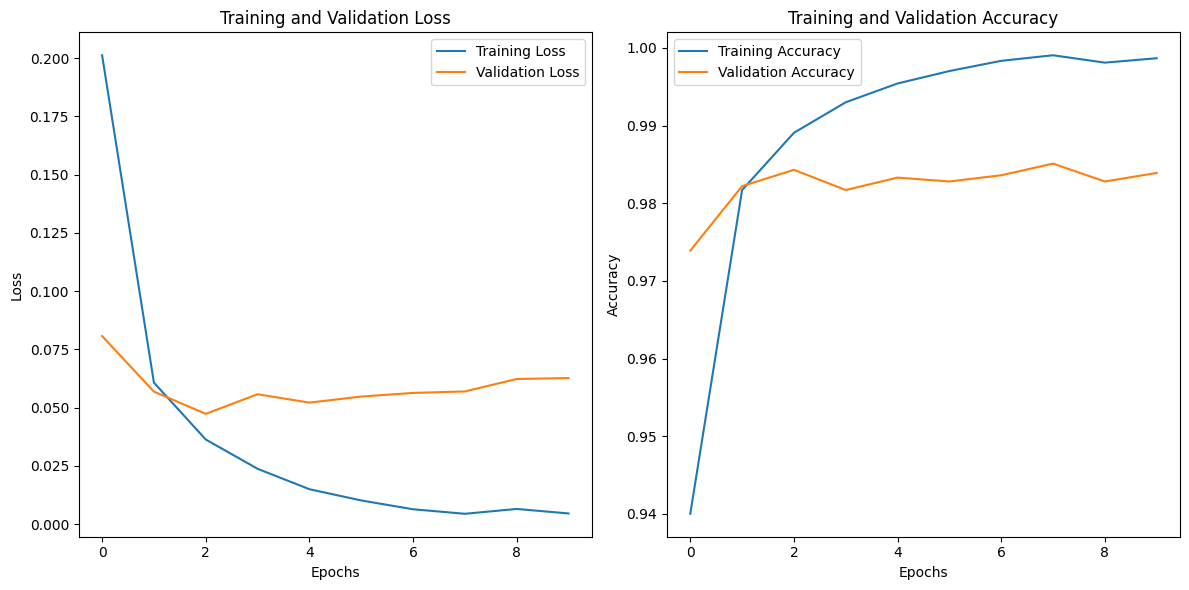

In [5]:
import matplotlib.pyplot as plt

# Extracting training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 51ms/step


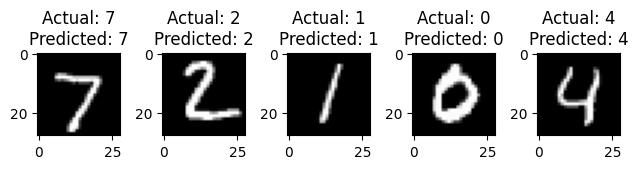

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded the MNIST dataset
# X_test and y_test are used for testing in this example

# Define the number of images you want to display
num_images_to_display = 5

# Loop through the images and labels
for i in range(num_images_to_display):
    image = X_test[i].reshape(28, 28)  # Reshape to 28x28 to display
    actual_label = y_test[i]

    # Make a prediction for the image
    preprocessed_image = X_test[i].reshape(1, 28, 28, 1)
    predictions = model.predict(preprocessed_image)
    predicted_label = np.argmax(predictions)

    # Create subplots for each image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")

# Adjust the layout and display the images
plt.tight_layout()
plt.show()
